## Section A. Model Complexity and Model Selection

### Question 1

1. Implement the KNN regressor function:
knn(train.data, train.label, test.data, K=3)
2
which takes the training data and their labels (continuous values), the test
set, and the size of the neighborhood (K). It should return the regressed
values for the test data points. Note that, you need to use a distance
function to choose the neighbors. The distance function used to measure
the distance between a pair of data points is Manhattan distance function.

In [1]:
# KNN function
knn_1 <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
#     print(dist)
    prediction_df = c()
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        average = sum(train.label[nn])/K
        prediction_df[i] <- average
    }
    
    ## return the class labels as output
    return (prediction_df)
}

2. Plot the training and the testing errors versus 1/K for K=1,.., 30 in one plot,
using the Task1A_train.csv and Task1A_test.csv datasets provided for
this assignment. Save the plot in your Jupyter Notebook file for Question 1.
Report your chosen error function in your Jupyter Notebook file.

**Reading the dataset and getting it ready for knn-regression**

In [2]:
train_A = read.csv('Task1A_train.csv')
test_A = read.csv('Task1A_test.csv')

In [3]:
head(train_A)
head(test_A)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [4]:
#slicing the data for model

train_data_A = train_A[1:1]
cat("Train data")
head(train_data_A,3)
cat("Train Label")
train_label_A = train_A[,2]
head(train_label_A,3)
cat("Test data")
test_data_A = test_A[1:1]
head(test_data_A,3)

Train data

x1
1960.0
1960.5
1961.0


Train Label

[1] 0.71 0.85 0.61

Test data

x1
1960.25
1960.75
1961.25


In [5]:
# KNN function
knn_2 <- function(train.data, train.label, test.data, K){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len),drop=FALSE]
    prediction_df = c()
    
    ## for each test sample
    for (i in 1:test.len){
        ### find its K nearest neighbours from training sampels
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        average = sum(train.label[nn])/K
        prediction_df[i] <- average
    }
    
    ## return the class labels as output
    return (prediction_df)
}

In [6]:
# library(ggplot2)
train_error = c() # vector to save train errors
test_error = c() # vector to save test errors
k_value = c()
for (k in 1:30) {
    training_model = knn_2(train_data_A, train_label_A, train_data_A,k) # knn training model 
    testing_model = knn_2(train_data_A, train_label_A, test_data_A,k)  # knn test model
    test_error_k = mean((test_A[,2] - testing_model) ^ 2)
    train_error_k = mean(abs(train_A[,2]  - testing_model))
    train_error[k] <- train_error_k
    test_error[k] <- test_error_k
    k_value[k] <- k
}

In [7]:
#data frame to store fold number and train, test errors respectively
train_test_error_df = data.frame(k_fold = k_value,train_err = train_error,test_err=test_error)
head(train_test_error_df)

k_fold,train_err,test_err
1,0.0000000,1.689724
2,0.2460714,2.126671
3,0.2623016,1.695130
4,0.2915476,1.852862
5,0.2490952,1.380205
6,0.3626984,1.472957


Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

K,error_type,error_value
1,train_err,0.0000000
2,train_err,0.2460714
3,train_err,0.2623016
4,train_err,0.2915476
5,train_err,0.2490952
6,train_err,0.3626984


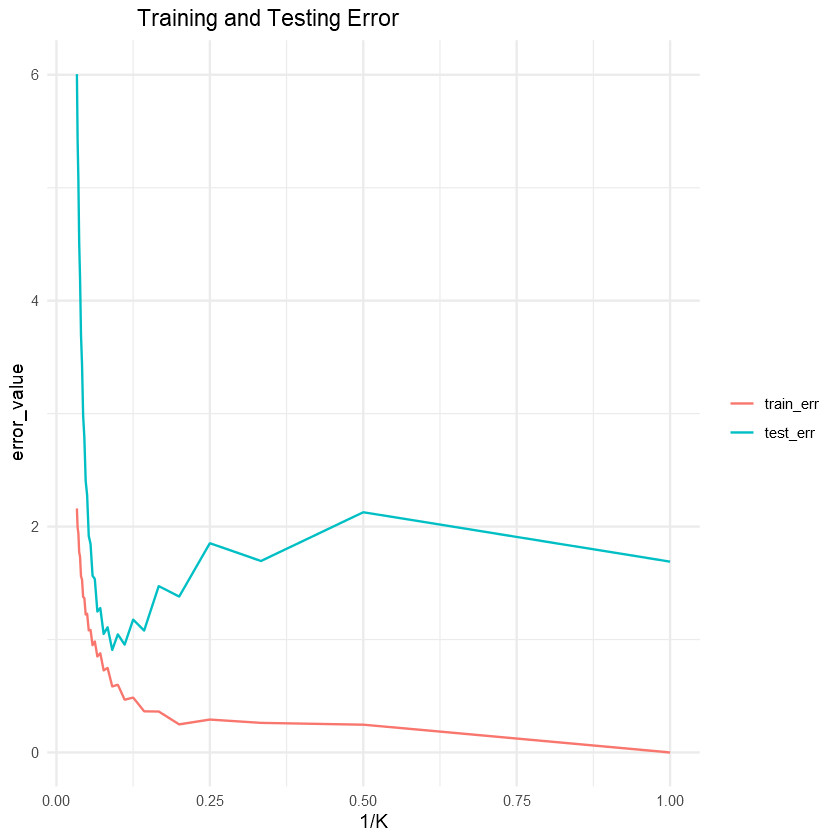

In [8]:
# install.packages("reshape2")
library(reshape2)
library(ggplot2)

miss.m <- melt(train_test_error_df, id='k_fold') # reshape for visualization
names(miss.m) <- c('K', 'error_type', 'error_value')

head(miss.m) #peek at melted train_test_error_df 

# Plotting train and test errors
ggplot(data=miss.m, aes(x=1/K, y=error_value, color=error_type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("               Training and Testing Error")

3. Report (in your Jupyter Notebook file) the optimum value for K in terms of
the testing error. Discuss the values of K and model complexity
corresponding to underfitting and overfitting based on your plot in the
previous part. <br>

**Testing Error:** <br>
* For k = 1 testing error is higher than the training error
* For k=2 testing error shows an increase and then dips for incresed values of k. <br>

NOTE: Optimum value corresponds to the value of k were our training and testing errors are minimum respectively. <br>
The optimum value of k according to the testing error would be **k=9** <br>

**Model Complexity for different values of k :** <br>
* For k=1 the training error is equal to zero and our testing error is high. For this k-value the model overfits on training data and will lead to higher errors on our testing data.
* For k>12 both training and testing errors are on higher side i.e our model is underfitting on training data which leads to higher testing errors, aswell